In [45]:
%matplotlib inline


from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
# Load the IRIS dataset, as in the labs
mySeed=1234567

iris = datasets.load_iris()

X=iris.data 
y=iris.target 

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [46]:
def myplotGrid(X, y):
    fig = plt.figure(figsize=(20,20))

    counter = 0
    for i in range(0,4):
        for j in range(0,4):
            counter += 1

            if i == j:
                ax = fig.add_subplot(4,4,counter)
                ax.hist(X[:, i])
                plt.xlabel('Sepal length') 
                plt.ylabel('Sepal width')
            else:
                ax = fig.add_subplot(4,4,counter)
                ax.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.Paired)
                plt.xlabel('Sepal length') 
                plt.ylabel('Sepal width')
    




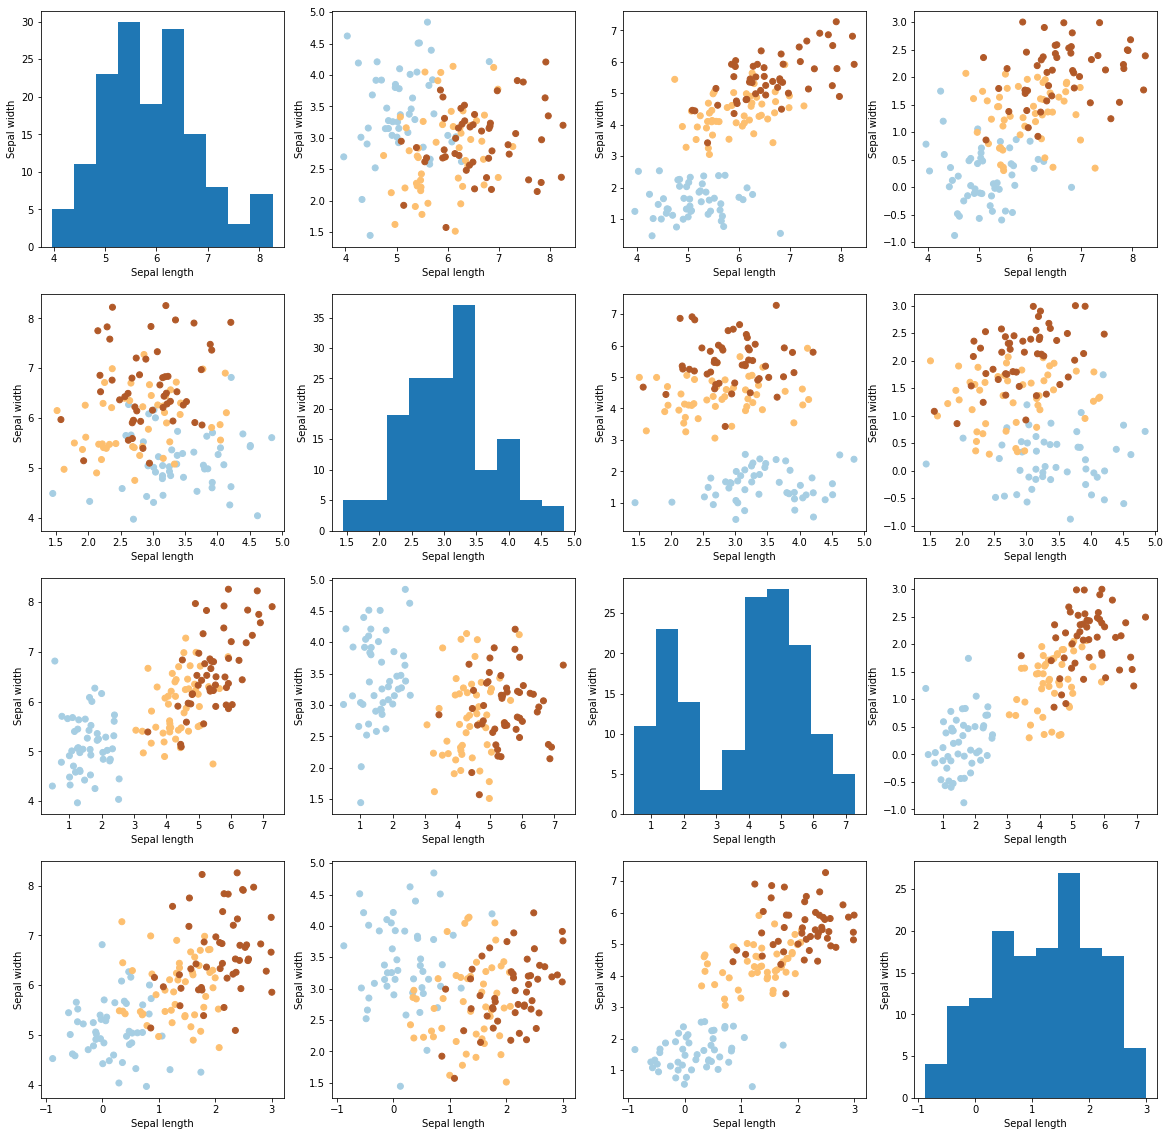

In [47]:
np.random.seed(mySeed) # initialize random seed to replicate results over different runs
XN=X+np.random.normal(0,0.5,X.shape)

myplotGrid(XN,y)


In [50]:

X = iris.data
y = iris.target
def euclideanDistance(in1,in2):
    dist = np.linalg.norm(in1-in2)
    return dist 




def getNeighbours(x_,X,n,Total): 
    dist = []
    for i in range(Total):
        f = euclideanDistance(x_,X[i])
        dist.append(f)
        
    dist = np.argsort(dist)
      
    return dist[:n] 



def mykNN(X, y, X_, n):
    
    #get the neighbours
    final = []
    i = 0
    while i < len(X_):
    
        x_= X[i]
        
        neighbours = getNeighbours(x_, X, n, X.shape[0])
        newy = y[neighbours] 
        
        final.append(newy)
        i += 1
    return final


indices= np.random.permutation(X.shape[0]) 
j=np.hsplit(indices,2)

print(mykNN(X[j[0]], y, y[j[1]], 10))

[array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1]), array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1]), array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0]), array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1]), array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0]), array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0]), array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1]), array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1]), array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0]), array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0]), array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1]), array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0]), array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0]), array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0]), array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0]), array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0]), array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0]), array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0]), array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0]), array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0]), array([0, 1, 0, 0, 1, 1,

In [52]:
def myConfMat(y_test,y_pred,classno):
    #print(y_test)
    #print(y_pred)

    C= np.zeros((classno, classno), dtype=int)
    arr = np.unique(y_test)

    for i in range(len(y_test)):
        if y_pred[i].all() == y_test[i]:
            C[y_test[i], y_pred[i]] += 1
        
        elif y_pred[i].all() != y_test[i]:
            if y_pred[i] in arr:
                C[y_test[i], y_pred[i]] += 1
    
   
  
    return C

def myAccuracy(y_test,y_pred):
    C = myConfMat(y_test,y_pred,len(np.unique(y)))
    diagnol = 0
    total = 0
    for i in range(len(C)):
        for j in range(len(C)):
            total += C[i][j]
            if i == j:
                #print("d = ", C[i][j], " + ")
                diagnol += C[i][j]
        
    #print(total)
    accuracy=(diagnol / total) * 100 # change this line
    return accuracy
print('CONFUSION MATRIX: ', myConfMat(y[foldTest],y_pred,len(np.unique(y))))

# nested cross validation function
# X - data / features
# y - outputs
# foldK - number of folds
# nns - list of number of neighbours parameter for validation
# dists - list of distances for validation
# mySeed - random seed
# returns: accuracy over 5 folds (list)

def myNestedCrossVal(X,y,foldK,nns,dists,mySeed):
    np.random.seed(mySeed)
    accuracy_fold=[]

    accuracy_testing = []
    
    #TASK: use the function np.random.permutation to generate a list of shuffled indices from in the range (0,number of data)
    #(you did this already in a task above)
    indices=np.random.permutation(list(range(X.shape[0])))
    #print(indices)
    
    #TASK: use the function array_split to split the indices to foldK different bins (here, 5)
    #uncomment line below
    bins= np.array_split(indices, foldK)
    #print(bins)
    
    #no need to worry about this, just checking that everything is OK
    assert(foldK==len(bins))
    
    #loop through folds
    for i in range(0,foldK):
        foldTrain=[] # list to save current indices for training
        foldTest=[]  # list to save current indices for testing
        foldVal=[]    # list to save current indices for validation

        #loop through all bins, take bin i for testing, the next bin for validation, and the rest for training
        foldTest.extend(bins[i])
        for j in range(0,len(bins)):
            if j != i:
                foldTrain.extend(bins[j])
                
        if i+1 > len(bins)-1:
            foldVal.extend(bins[0])
        else:
            foldVal.extend(bins[i+1])
        
        foldTrain = np.setdiff1d(foldTrain, foldVal)
        
        foldTrain = foldTrain.tolist()

        #print('** Train', len(foldTrain), foldTrain)
        #print('** Val', len(foldVal), foldVal)
        #print('** Test', len(foldTest), foldTest)
            
        #print("Debug 1: ", np.intersect1d(foldTest,foldVal))
        #print("Debug 2: ", np.intersect1d(foldTrain,foldTest))
        #print("Debug 3: ", np.intersect1d(foldTrain,foldVal))

        
        #no need to worry about this, just checking that everything is OK
        assert not np.intersect1d(foldTest,foldVal)
        assert not np.intersect1d(foldTrain,foldTest)
        assert not np.intersect1d(foldTrain,foldVal)
       
        bestDistance='' #save the best distance metric here
        bestNN=-1 #save the best number of neighbours here
        bestAccuracy=-10 #save the best attained accuracy here (in terms of validation)
        
        
        # loop through all parameters (one for loop for distances, one for loop for nn)            
        # train the classifier on current number of neighbours/distance
        # obtain results on validation set
        # save parameters if results are the best we had
        for k in range(0,len(dists)):
            for l in range(0,len(nns)):
                #knn=KNeighborsClassifier(n_neighbors=nns[l], metric=dists[k])
                #knn.fit(X[foldTrain], y[foldTrain])
                #j_pred=knn.predict(X[foldVal])
                
                ## X is training data == X[foldTrain]
                # X_ testing data == y[foldTest]
                # y is training output
                #def mykNN(X, y, X_, options):
                #mykNN(X[foldTrain], y, y[foldTrain], 10, 'euclidean')
                #print(X[foldTrain])
                #print(y[foldVal])
                
                j_pred = mykNN(X[foldTrain], y, y[foldVal], nns[l])
                
                acc2 = myAccuracy(y[foldVal] ,j_pred)
                
                accuracy_testing.append(acc2)
                                            
                if max(accuracy_testing) > bestAccuracy:
                    bestAccuracy = max(accuracy_testing)
                    bestDistance = dists[k]
                    bestNN = accuracy_testing.index(max(accuracy_testing)) + 1
                    
        accuracy_testing = []
                        
        print('**  Best NN', bestNN, 'best Distance', bestDistance)
        

      
        foldTrain.extend(foldVal)
        
       
        
        y_pred = mykNN(X[foldTrain], y, y[foldTrain], bestNN)
        
        acc = myAccuracy(y[foldTest] ,y_pred)
        
        accuracy_fold.append(acc)   

        print('==== Final Cross-val ', bestNN, 'dist', bestDistance, ' accuracy ',myAccuracy(y[foldTest],y_pred))

    return accuracy_fold;
    

 
accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
print(accuracy_fold)


CONFUSION MATRIX:  [[25  0  0]
 [ 0 21  1]
 [ 0  8 20]]


/Users/Alveena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/Alveena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:96: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/Alveena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/Alveena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  del sys.path[0]


**  Best NN 2 best Distance euclidean
==== Final Cross-val  2 dist euclidean  accuracy  84.61538461538461
**  Best NN 2 best Distance euclidean
==== Final Cross-val  2 dist euclidean  accuracy  92.3076923076923
**  Best NN 2 best Distance euclidean
==== Final Cross-val  2 dist euclidean  accuracy  100.0
**  Best NN 2 best Distance euclidean
==== Final Cross-val  2 dist euclidean  accuracy  73.33333333333333
**  Best NN 2 best Distance euclidean
==== Final Cross-val  2 dist euclidean  accuracy  78.57142857142857
[84.61538461538461, 92.3076923076923, 100.0, 73.33333333333333, 78.57142857142857]
